## Reading Data

In [1]:
# Load library
import pandas as pd
import numpy as np
import os

In [2]:
# Set folder locations

# Reading data
netflix_data = pd.read_csv(r'C:\Users\DELL\Downloads\archive (3)\netflix_titles.csv')
netflix_data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [3]:
# Data structure
print(netflix_data.shape)

(8807, 12)


In [4]:
# Analyse data types
print(netflix_data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [5]:
# Evaluate missingness
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# data summary
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Section A: Expected cleaned and transformed data
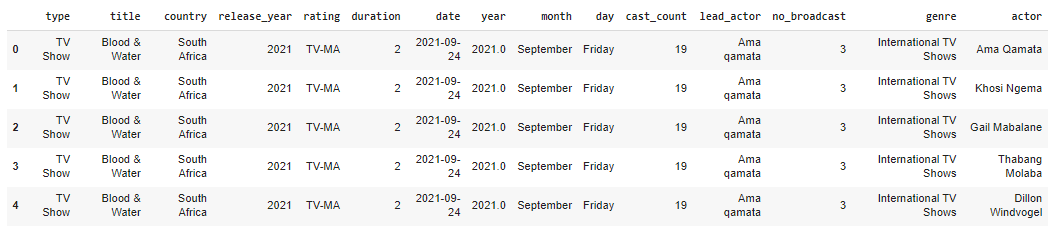

In [7]:
# Remove unnecessary columns like show_id, description, and director.

netflix_data.drop(labels=['show_id','description','director'],axis=1,inplace=True)

In [8]:
# Eliminate rows with missing values from the dataset.
netflix_data.dropna(axis=0,how='any',inplace=True)

In [9]:
# Convert the date_added and release_year columns into datetime format, and extract year, month, and day from date_added, along with extracting the year from release_year.
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'],format='mixed')

In [10]:
netflix_data['date_added']

1      2021-09-24
4      2021-09-24
7      2021-09-24
8      2021-09-24
9      2021-09-24
          ...    
8801   2016-03-09
8802   2019-11-20
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 7290, dtype: datetime64[ns]

In [11]:
# Convert the date_added and release_year columns into datetime format, and extract year, month, and day from date_added, along with extracting the year from release_year.

netflix_data['release_year'] = pd.to_datetime(netflix_data['release_year'])

In [12]:
# Convert the date_added and release_year columns into datetime format, and extract year, month, and day from date_added, along with extracting the year from release_year.

netflix_data['year'] = pd.DatetimeIndex(netflix_data['date_added']).year

netflix_data['month'] = pd.DatetimeIndex(netflix_data['date_added']).month

netflix_data['day'] = pd.DatetimeIndex(netflix_data['date_added']).day

In [13]:
netflix_data['release_year']= pd.DatetimeIndex(netflix_data['release_year']).year

In [14]:
netflix_data.head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,year,month,day
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9,24
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,9,24
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1970,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24
8,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,1970,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,9,24
9,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,1970,PG-13,104 min,"Comedies, Dramas",2021,9,24


In [15]:
# Calculate the total number of cast members for each show or movie and 

netflix_data['cast_count'] = netflix_data['cast'].apply(lambda x: len(str(x).split(',')))

netflix_data['cast_count']

1       19
4        8
7        8
8        4
9       11
        ..
8801     6
8802    10
8804     7
8805     9
8806     8
Name: cast_count, Length: 7290, dtype: int64

In [16]:
# determine how to extract the lead actor’s name from the cast column, assuming the first actor listed is the lead.
netflix_data['lead_actor'] = netflix_data['cast'].str.split(',').str.get(0)
# netflix_data['lead_actor'] = netflix_data['cast'].str[0]
netflix_data['lead_actor']


1             Ama Qamata
4             Mayur More
7           Kofi Ghanaba
8           Mel Giedroyc
9       Melissa McCarthy
              ...       
8801         Ali Suliman
8802        Mark Ruffalo
8804     Jesse Eisenberg
8805           Tim Allen
8806       Vicky Kaushal
Name: lead_actor, Length: 7290, dtype: object

In [17]:
# 6.Standardize the duration column by converting it into an integer format.

netflix_data['duration'] = netflix_data['duration'].str.split(' ').str.get(0).astype('int')

In [18]:
netflix_data.head(4)

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,year,month,day,cast_count,lead_actor
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2021,9,24,19,Ama Qamata
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",2021,9,24,8,Mayur More
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1970,TV-MA,125,"Dramas, Independent Movies, International Movies",2021,9,24,8,Kofi Ghanaba
8,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,1970,TV-14,9,"British TV Shows, Reality TV",2021,9,24,4,Mel Giedroyc


In [19]:
# 7.Clean and capitalize the country names in the country column, ensuring no extra spaces.

netflix_data['country']= netflix_data['country'].str.strip().str.title()

In [20]:
netflix_data.head(4)

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,year,month,day,cast_count,lead_actor
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2021,9,24,19,Ama Qamata
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",2021,9,24,8,Mayur More
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1970,TV-MA,125,"Dramas, Independent Movies, International Movies",2021,9,24,8,Kofi Ghanaba
8,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,1970,TV-14,9,"British TV Shows, Reality TV",2021,9,24,4,Mel Giedroyc


In [21]:
# Calculate how many genres each show or movie is listed under (i.e., column to be added is genre count).

netflix_data['genre_count'] = netflix_data['listed_in'].apply(lambda x: len(str(x).split(',')))

In [22]:
netflix_data.head(2)

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,year,month,day,cast_count,lead_actor,genre_count
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2021,9,24,19,Ama Qamata,3
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",2021,9,24,8,Mayur More,3
